# Notebook activity A2.8  More testing for cointegration using R

In this notebook activity, you will be using R to address the question 'are coffee spot and futures prices cointegrated?' using the coffee prices dataset. You will approach this by first testing for cointegration between two series and, if it's found that the series are cointegrated and therefore that a long-run equilibrium relationship exists between them, estimating an error correction model.  As a reminder the variables in this dataset are

* `spot`: the daily indicator price for Brazilian naturals compiled by the International Coffee Association – these are the weighted average of the prices of physical coffee delivered to the ports of New York, Hamburg and Marseille in US cents per lb
* `futures`: the price of the Coffee C Futures contract traded on the ICE exchange in New York.

The data for the coffee prices dataset is stored in the `coffeePrices` data frame.

## (a) Getting started

### (i) 

Start by running the following code.

In [ ]:
# Load the M348 package
library(M348)
# Load the urca package
library(urca)
# Load the coffeePrices data frame
data(coffeePrices)
# Check the data frame has loaded OK
head(coffeePrices)
tail(coffeePrices)

In this notebook we will consider the logs of the spot prices and of the futures prices. We will also convert these variables  to time series objects. Notice that these are daily prices not quarterly, so the frequency is 1 rather than 4 as in previous examples. This means that in the `ts()` command the argument `frequency` become `frequency = 1`. However, as 1 is the default value for `frequency`, this argument can be missed out. 

### (ii)

Use the code cell below to convert the logs of both `spot` and `futures` to be time series with daily frequency called `logSpotTS` and `logFuturesTS` respectively.

#### Solution <a class="tocSkip">

The required code is given below. Note that running this code will not produce any output. 

In [2]:
logSpotTS <- ts(log(coffeePrices$spot))
logFuturesTS <- ts(log(coffeePrices$futures))

## (b) Exploring the time series

### (i)

Construct a joint time plot of `logSpotTS` and `logFuturesTS` by adapting the following code from Notebook activity A2.7. 

In [3]:
# plot(jppTS, ylim = range(jppTS, uspTS), 
#       ylab = "Price level (in logs)", xlab = "Year")
# lines(uspTS, col = 2, lty = 2)
# legend("topright", c("jppTS", "uspTS"), lty = 1:2, col = 1:2)

#### Solution <a class="tocSkip">

The required code and resulting plot are given below.

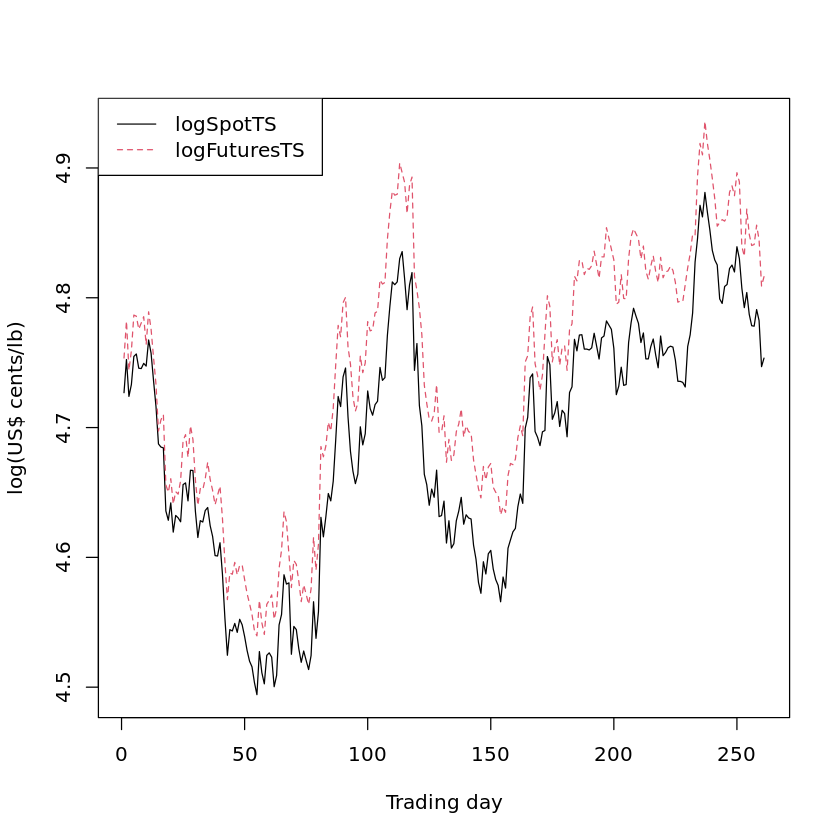

In [4]:
# plot logSpotTS first, set the y-scale to make room for logFuturesTS
ts.plot(logSpotTS, ylim = range(logSpotTS, logFuturesTS), 
        ylab = "log(US$ cents/lb)", xlab = "Trading day")
# Add logFuturesTS to the plot
lines(logFuturesTS, col = 2, lty = 2)
# add a legend
legend("topleft", c("logSpotTS","logFuturesTS"), lty = 1:2, col = 1:2)

### (ii)

Based on the plot you produced in part (i), is it possible that the two variables are cointegrated? Why or why not?

#### Solution <a class="tocSkip">

The coffee price series move very closely together, so it is possible that they are cointegrated.

---

###  <a class="tocSkip">

In part (ii) you considered whether `logSpotTS` and `logFuturesTS` could be cointegrated. You will next start to consider whether they contain a unit root.

### (iii)

Use the empty code cell below to obtain  a joint time plot of the first differences of `logSpotTS` and `logFuturesTS`

#### Solution <a class="tocSkip">

The required code and resulting plot are given below.

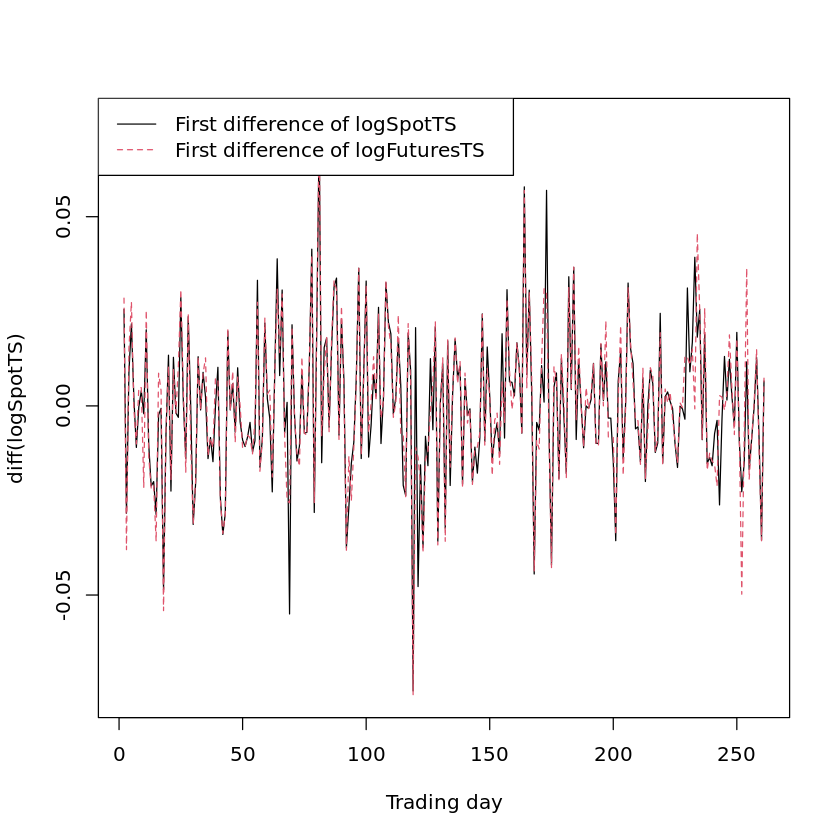

In [5]:
# obtain a joint time plot of the first differences
ts.plot(diff(logSpotTS), ylim = range(diff(logSpotTS), diff(logFuturesTS)), 
        xlab = "Trading day")
lines(diff(logFuturesTS), col = 2, lty = 2)
legend("topleft", c("First difference of logSpotTS", 
                    "First difference of logFuturesTS"), 
        lty = 1:2, col = 1:2)

### (iv)

Why do the plots you obtained in parts (i) and (iii) suggest that both `logSpotTS` and `logFuturesTS` might be I(1)?

#### Solution <a class="tocSkip">

The time plots in part (i) suggest that the mean might not be constant, in which case neither series is stationary.

The first differences *may be* stationary as it looks like the mean and variance could be constant. So this means that `logSpotTS` and `logFuturesTS` might be I(1).

### (v)

Use the code cell below to obtain correlograms of `logSpotTS` and `logFuturesTS`, and of their first differences.

#### Solution <a class="tocSkip">

The required code and resulting plots are given below.

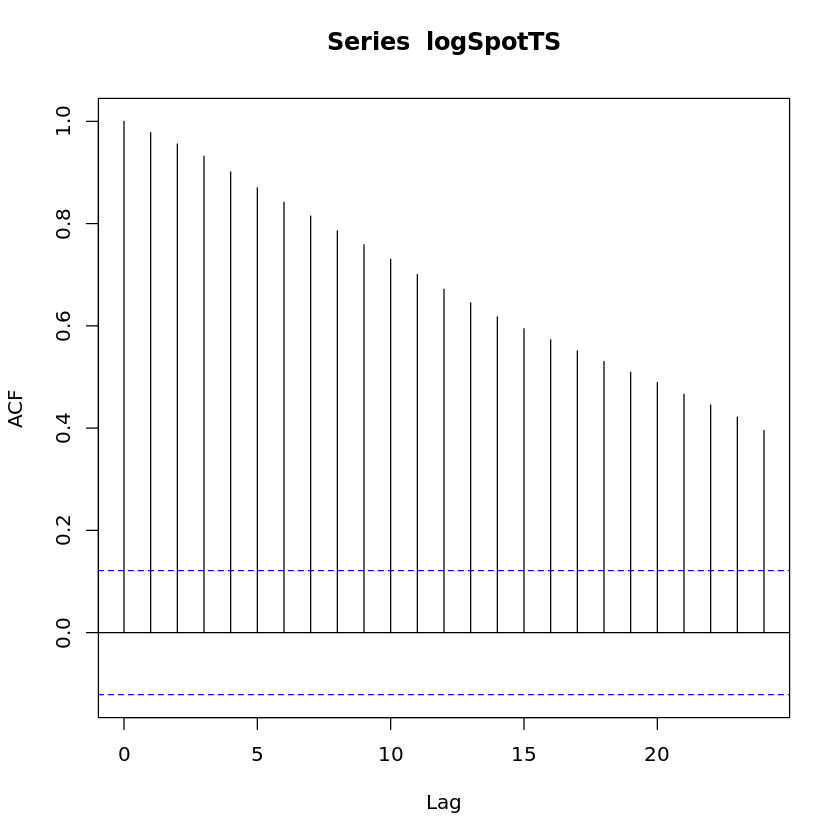

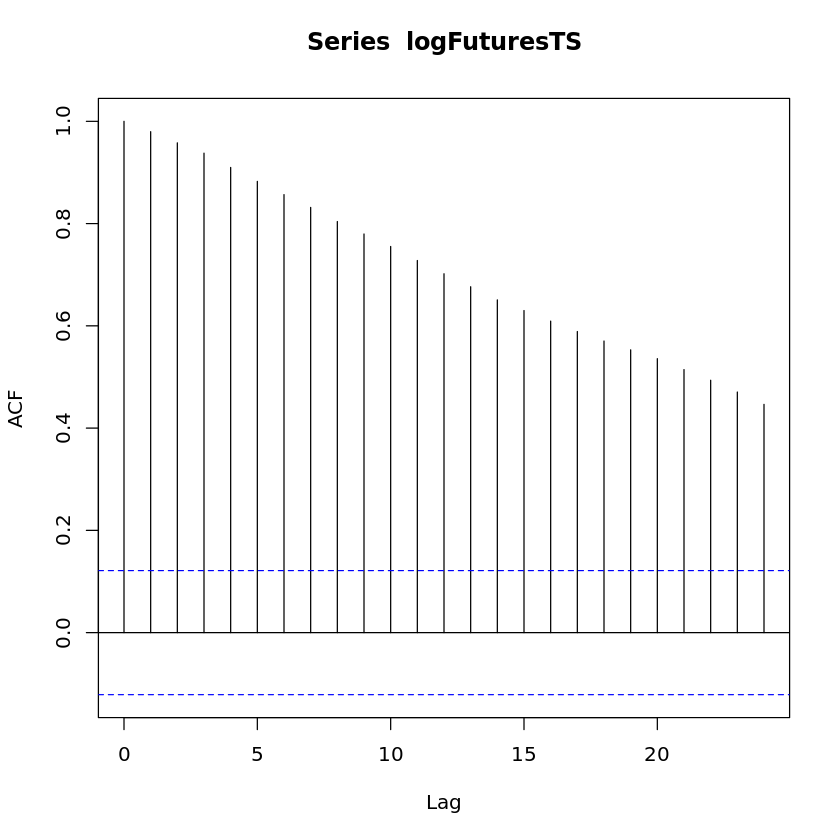

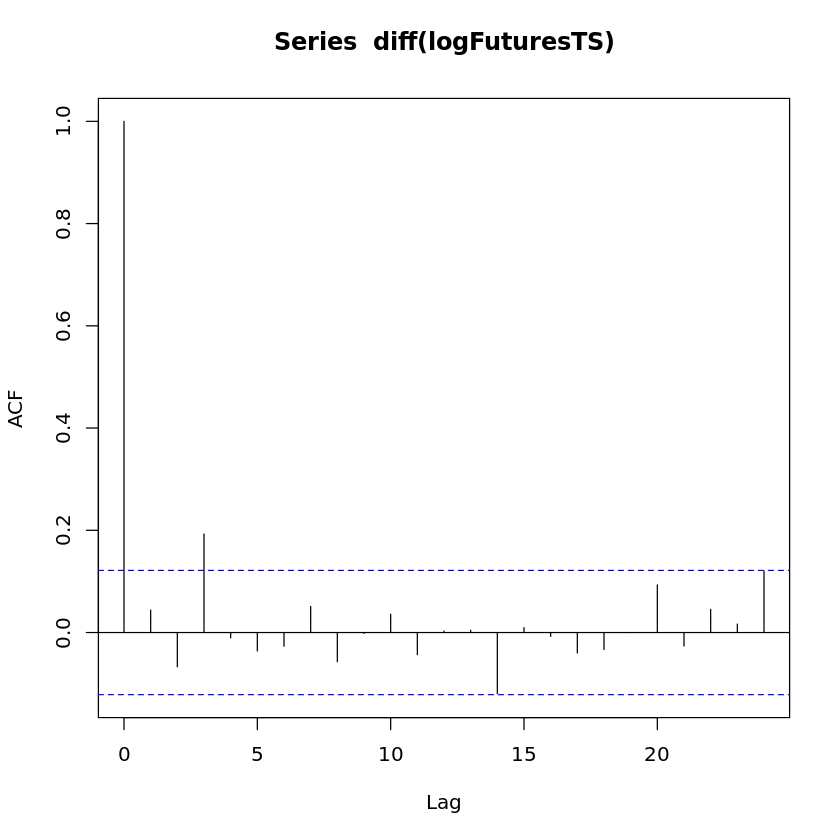

In [6]:
# plot the ACF functions for the series and their first differences
acf(logSpotTS)
acf(diff(logSpotTS))
acf(logFuturesTS)
acf(diff(logFuturesTS))

### (vi)

Based on the correlograms you obtained in part (v) which, if any, of the time series are persistent?

#### Solution <a class="tocSkip">

The correlation between current and lagged values of both `logSpotTS` and `logFuturesTS` decay slowly with the order of the lag demonstrating persistence.

In contrast this correlation quickly becomes close to zero to both first differenced variables so they are not persistent.

## (c) Testing for unit roots

In part (b)(iv) it was noted that both `logSpotTS` and `logFuturesTS` might be  I(1). We will explore this further in this part using the ADF tests of the variables in levels and in first differences.

### (i)

Using the code cell below to perform the ADF on `logSpotTS`, using a random walk with drift specification, and a simple random walk specification. When doing this use AIC to select an appropriate lag length.

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [7]:
# ADF test with a random walk with drift specification with 
# using the AIC to select lag length
summary(ur.df(logSpotTS, type = "drift",  selectlags = "AIC"))

# ADF test with a simple random walk specification with 
# using the AIC to select lag length
summary(ur.df(logSpotTS, type = "none",  selectlags = "AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.072620 -0.011467 -0.000268  0.011542  0.069883 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.097709   0.059782   1.634    0.103
z.lag.1     -0.020844   0.012751  -1.635    0.103
z.diff.lag   0.003521   0.062320   0.056    0.955

Residual standard error: 0.01927 on 256 degrees of freedom
Multiple R-squared:  0.01038,	Adjusted R-squared:  0.002649 
F-statistic: 1.343 on 2 and 256 DF,  p-value: 0.263


Value of test-statistic is: -1.6347 1.3361 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.44 -2.87 -2.57
phi1  6.47  4.61  3.79



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.075230 -0.010733 -0.000372  0.011298  0.072834 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
z.lag.1    -7.321e-06  2.562e-04  -0.029    0.977
z.diff.lag -7.103e-03  6.218e-02  -0.114    0.909

Residual standard error: 0.01933 on 257 degrees of freedom
Multiple R-squared:  5.411e-05,	Adjusted R-squared:  -0.007728 
F-statistic: 0.006953 on 2 and 257 DF,  p-value: 0.9931


Value of test-statistic is: -0.0286 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


### (ii)

Based on your results in part (c)(i), is it possible that `logSpotTS` contains a unit root?

#### Solution <a class="tocSkip">

When we assume the model is a random walk with drift, the ADF test statistic is $-1.635$ and the 10% critical value is -$2.57$
so we **cannot** reject the null hypothesis that `logSpotTS` has a unit root in favour of the alternative that it is stationary.

The same conclusion is drawn (and even more strongly so) when the model is a simple random walk. 

### (iii)

Using the code cell below to perform the ADF on `logFuturesTS`, again using a random walk with drift specification, and a simple random walk specification and using AIC to select an appropriate lag length.

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [8]:
# ADF test with a random walk with drift specification with 
# using the AIC to select lag length
summary(ur.df(logFuturesTS, type = "drift",  selectlags = "AIC"))

# ADF test with a simple random walk specification with 
# using the AIC to select lag length
summary(ur.df(logFuturesTS, type = "none",  selectlags = "AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.07386 -0.01170  0.00052  0.01165  0.07149 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.09144    0.05770   1.585    0.114
z.lag.1     -0.01926    0.01217  -1.583    0.115
z.diff.lag   0.05395    0.06222   0.867    0.387

Residual standard error: 0.01924 on 256 degrees of freedom
Multiple R-squared:  0.01161,	Adjusted R-squared:  0.003893 
F-statistic: 1.504 on 2 and 256 DF,  p-value: 0.2242


Value of test-statistic is: -1.5831 1.2583 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.44 -2.87 -2.57
phi1  6.47  4.61  3.79



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.076698 -0.011182 -0.000533  0.012145  0.074246 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
z.lag.1    1.758e-05  2.530e-04   0.069    0.945
z.diff.lag 4.388e-02  6.208e-02   0.707    0.480

Residual standard error: 0.0193 on 257 degrees of freedom
Multiple R-squared:  0.001964,	Adjusted R-squared:  -0.005803 
F-statistic: 0.2529 on 2 and 257 DF,  p-value: 0.7767


Value of test-statistic is: 0.0695 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


### (iv)

Based on your results in part (c)(iii), is it possible that `logFuturesTS` contains a unit root?

#### Solution <a class="tocSkip">

This time, for `logFuturesTS` when we assume the model is a random walk with drift, the ADF test statistic is $-1.583$ and the 10% critical value is again -$2.57$ so we **cannot** reject the null hypothesis that `logFuturesTS` has a unit root in favour of the alternative that it is stationary.

The same conclusion is drawn (and even more strongly so) when the model is a simple random walk. 

### (v)

Now, using the code below, perform ADF tests on the first differences of `logSpotTS` and `logFuturesTS`, using a simple random walk specification and AIC to select the lag length. 

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [9]:
# Testing for a unit root in the first difference of logSpotTS
summary(ur.df(diff(logSpotTS), type = "none",  selectlags = "AIC"))

# Testing for a unit root in the first difference of logFuturesTS
summary(ur.df(diff(logFuturesTS), type = "none",  selectlags = "AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.075923 -0.010480 -0.000122  0.011116  0.073505 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.96889    0.08835  -10.97   <2e-16 ***
z.diff.lag -0.03059    0.06242   -0.49    0.625    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01928 on 256 degrees of freedom
Multiple R-squared:  0.5023,	Adjusted R-squared:  0.4984 
F-statistic: 129.2 on 2 and 256 DF,  p-value: < 2.2e-16


Value of test-statistic is: -10.967 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.075173 -0.010826 -0.000734  0.012066  0.072221 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -1.01167    0.08550 -11.832   <2e-16 ***
z.diff.lag  0.07058    0.06201   1.138    0.256    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01913 on 256 degrees of freedom
Multiple R-squared:  0.4785,	Adjusted R-squared:  0.4744 
F-statistic: 117.4 on 2 and 256 DF,  p-value: < 2.2e-16


Value of test-statistic is: -11.8324 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


### (vi)

Based on the results you obtained in part (c)(v), is there evidence that the first difference of `logSpotTS` and/or `logFuturesTS` are stationary. Hence is there evidence that `logSpotTS` and/or `logFuturesTS` are I(1)?

#### Solution <a class="tocSkip">

For the first difference of `logSpotTS`, the ADF test statistic is -10.967 and the 1% critical value is -2.58
so we **reject** the null hypothesis that the first differences of `logSpotTS` has a unit root in favour of the alternative that it is stationary.

For the first difference of `logFuturesTS`, the ADF test statistic is -11.8324 and the 1% critical value is -2.58
so again we **reject** the null hypothesis that the first differences of `logFuturesTS` follows a random walk in favour of the alternative that it is stationary.

So putting the results from all the ADF tests together, there is evidence that both `logSpotTS` and `logFuturesTS` contain a unit root and are I(1).

## (d) Exploring cointegration 

In this part we will explore cointegration between `logSpotTS` and `logFutures` by doing the following.

1. Estimate first-stage regression of the Engle-Granger cointegration test.
2. Compute the residuals from the regression and visually inspect them.
3. Conduct an ADF test on the residuals.
4. Should the residuals be I(0), we can conclude that the series `logSpotTS` and `logFutures` are cointegrated.

### (i)

Use the code cell below to estimate the cointegration regression between `logSpotTS` and `logFuturesTS`. (Here you should treat `logSpotTS` as the dependent variable.) 

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [10]:
coint <- lm(logSpotTS ~  logFuturesTS)
summary(coint)


Call:
lm(formula = logSpotTS ~ logFuturesTS)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.025779 -0.008535 -0.003081  0.005691  0.040618 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.205072   0.041400   4.953 1.32e-06 ***
logFuturesTS 0.945588   0.008731 108.305  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0139 on 259 degrees of freedom
Multiple R-squared:  0.9784,	Adjusted R-squared:  0.9783 
F-statistic: 1.173e+04 on 1 and 259 DF,  p-value: < 2.2e-16


### (ii)

Use the code cell below to retrieve the residuals from the regression you estimated in part (d)(i) and visually inspect them using a time plot and a correlogram.

(Look back at Notebook activity A2.7 if you need a reminder of how to do this.)

#### Solution <a class="tocSkip">

The required code and resulting output are as follows.

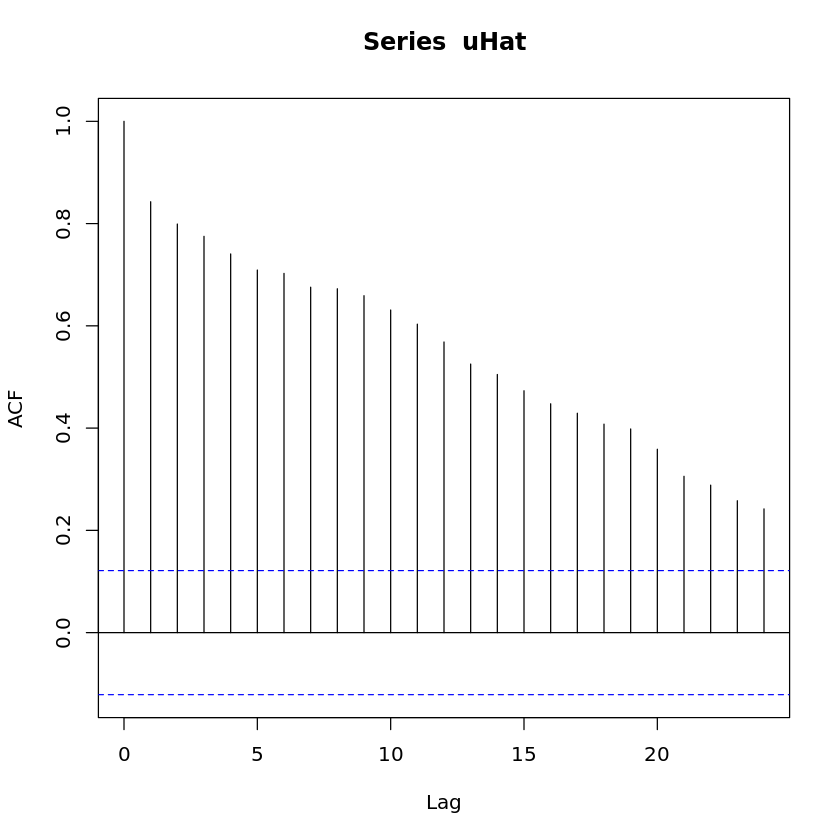

In [11]:
uHat <- ts(residuals(coint))
plot(uHat)
acf(uHat)

###  <a class="tocSkip">

The condition for cointegration of the two series is that the residuals of the cointegration regression should be stationary. 

### (iii)

From the plots you obtained in part (e)(ii) do the residuals from the cointegration regression look like they come from a white noise process (which, as stated in Example 9 in Subsection 4.2, is stationary)?

#### Solution <a class="tocSkip">

From the time plot its possible that the mean is not zero for the whole of the series, which is a sign that the residuals might not be from a white process. The residuals may still be stationary but the correlogram does show a very slow decrease in the serial correlation between the residuals and its lagged variables. Another messy example in practice!

### (iv)

Using the code cell below, obtain the results from an ADF test on the residuals. (In the ADF test use both the simple random walk and the random walk with drift specifications and select the number of lags using AIC.)

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [12]:
# compute the ADF test statistic
summary(ur.df(uHat, type = "none",  selectlags = "AIC"))
summary(ur.df(uHat, type = "drift",  selectlags = "AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.027449 -0.002812 -0.000379  0.002325  0.040647 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.11130    0.03228  -3.448  0.00066 ***
z.diff.lag -0.32385    0.05854  -5.532 7.79e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.006913 on 257 degrees of freedom
Multiple R-squared:   0.18,	Adjusted R-squared:  0.1736 
F-statistic: 28.21 on 2 and 257 DF,  p-value: 8.387e-12


Value of test-statistic is: -3.4477 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.027279 -0.002644 -0.000209  0.002493  0.040818 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0001699  0.0004303  -0.395 0.693282    
z.lag.1     -0.1113247  0.0323368  -3.443 0.000673 ***
z.diff.lag  -0.3242078  0.0586460  -5.528 7.97e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.006924 on 256 degrees of freedom
Multiple R-squared:  0.1803,	Adjusted R-squared:  0.1739 
F-statistic: 28.16 on 2 and 256 DF,  p-value: 8.847e-12


Value of test-statistic is: -3.4427 6.0017 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.44 -2.87 -2.57
phi1  6.47  4.61  3.79


### (v)

Based on the output you obtained in part (d)(iv), is there evidence that `logSpotTS` and `logFuturesTS` are cointegrated?

#### Solution <a class="tocSkip">

From the output in part (d)(iv), the test statistic for this ADF test for a simple random walk model, $-3.4477$, is less than the 1% critical value, $-2.58$, so we **reject** the null hypothesis that the residuals series contain a unit root in favour of the alternative that it is stationary and I(0). Similar results are obtained when we use a random walk with drift specification.

This evidence from the Engle Granger 2 step method allows us to infer that the series `logSpotTS` and `logFuturesTS` are cointegrated.

## (e) Estimating an error correction model (ECM)

In the part we will estimate the short-run relationship between `logSpotTS` and `logFutureTS` as an ECM.

### (i)

Adapt the code given below from Notebook activity A2.7 to estimate the ECM model and obtain a summary of the results.

In [13]:
# diffJPP <- c(NA,diff(jppTS))
# diffUSP <- c(NA, diff(uspTS))
# lagUHat <- uHat - c(NA,diff(uHat))

# pppCointData <- data.frame(jpp = jppTS, diffJPP = diffJPP, 
#                           usp = uspTS, diffUSP = diffUSP, 
#                           uHat = uHat, lagUHat = lagUHat)

# jppECM <- lm(diffJPP ~ diffUSP + lagUHat, data = pppCointData)
# summary(jppECM)

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [14]:
diffLogSpot <- c(NA,diff(logSpotTS))
diffLogFutures <- c(NA, diff(logFuturesTS))
lagUHat <- uHat - c(NA,diff(uHat))

coffeePricesCointData <- data.frame(logSpot = logSpotTS, 
                        diffLogSpot = diffLogSpot, logFutures = logFuturesTS, 
                        diffLogFutures = diffLogFutures, uHat = uHat, 
                        lagUhat = lagUHat)

coffeePricesECM <- lm(diffLogSpot ~ diffLogFutures + lagUHat, 
                      data = coffeePricesCointData)
summary(coffeePricesECM)


Call:
lm(formula = diffLogSpot ~ diffLogFutures + lagUHat, data = coffeePricesCointData)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.032743 -0.002668 -0.000333  0.002825  0.039805 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.0001146  0.0004522  -0.254      0.8    
diffLogFutures  0.9156346  0.0234571  39.034  < 2e-16 ***
lagUHat        -0.1581853  0.0326326  -4.847 2.17e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.007291 on 257 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.8587,	Adjusted R-squared:  0.8576 
F-statistic: 781.2 on 2 and 257 DF,  p-value: < 2.2e-16


### (ii)

Using the results you obtained in part (e)(i) comment on this ECM model.

#### Solution <a class="tocSkip">

We expect the coefficient on the error correction term (i.e. the lagged residuals) to be negative for convergence to an equilibrium and that is the case here. The coefficient is significant and the $R^2$ is also high.

The coefficient of the first difference term (`diffLogFutures`) is $0.916$, suggesting that over 90% of the change in the log of the spot price 'can be explained' by the change in the log of the futures price. The coefficient of the error correction term is $-0.158$, suggesting that around 16% of the previous period's deviation between the spot and futures price is corrected for the next period. 